### Install StatsAPI

In [2]:
!pip install MLB-StatsAPI

### Import Needed Libraries

In [4]:
import requests
import time
import statsapi
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.width = 0
pd.options.display.max_columns = 100
import warnings
warnings.filterwarnings(action='ignore')

### Import Season Results

In [6]:
games = statsapi.schedule(start_date = '2024-03-18', end_date = '2024-05-27', team="", opponent="", sportId=1, game_id=None)
G = pd.json_normalize(games)                          

In [7]:
G.head()

,game_id,game_datetime,game_date,game_type,status,away_name,home_name,away_id,home_id,doubleheader,game_num,home_probable_pitcher,away_probable_pitcher,home_pitcher_note,away_pitcher_note,away_score,home_score,current_inning,inning_state,venue_id,venue_name,national_broadcasts,series_status,winning_team,losing_team,winning_pitcher,losing_pitcher,save_pitcher,summary,losing_Team
0,764837,2024-03-18T03:00:00Z,2024-03-18,E,Final,San Diego Padres,LG Twins,135,2913,N,1,,Dylan Cease,,,5,4,9,Bottom,5150,Gocheok Sky Dome,[MLB.tv Free Game],None,San Diego Padres,LG Twins,Dylan Cease,Chan Kyu Im,Woo-Suk Go,2024-03-18 - San Diego Padres (5) @ LG Twins (...,NaN
1,764834,2024-03-18T10:00:00Z,2024-03-18,E,Final,Korea,Los Angeles Dodgers,1171,119,N,1,Bobby Miller,Been Gwak,,,2,5,9,Top,5150,Gocheok Sky Dome,[],None,Los Angeles Dodgers,Korea,Bobby Miller,Eui Lee Lee,None,2024-03-18 - Korea (2) @ Los Angeles Dodgers (...,NaN
2,747913,2024-03-18T17:05:00Z,2024-03-18,S,Final,Boston Red Sox,Minnesota Twins,111,142,N,1,Joe Ryan,Nick Pivetta,,,2,5,9,Top,2862,Lee Health Sports Complex,[],MIN wins Spring,Minnesota Twins,Boston Red Sox,Joe Ryan,Brendan Cellucci,Jordan Balazovic,2024-03-18 - Boston Red Sox (2) @ Minnesota Tw...,NaN
3,747910,2024-03-18T17:05:00Z,2024-03-18,S,Final,Pittsburgh Pirates,Philadelphia Phillies,134,143,N,1,Tyler Phillips,Martín Pérez,,,11,2,9,Bottom,2700,BayCare Ballpark,[],None,Pittsburgh Pirates,Philadelphia Phillies,Martín Pérez,Tyler Phillips,None,2024-03-18 - Pittsburgh Pirates (11) @ Philade...,NaN
4,747908,2024-03-18T17:05:00Z,2024-03-18,S,Final,Atlanta Braves,Tampa Bay Rays,144,139,N,1,Chris Devenski,Max Fried,,,3,7,9,Top,2534,Charlotte Sports Park,[],TB wins Spring,Tampa Bay Rays,Atlanta Braves,Manuel Rodríguez,Max Fried,None,2024-03-18 - Atlanta Braves (3) @ Tampa Bay Ra...,NaN


### Going to focus on pitch count for every half inning.

In [9]:
import json
# Example: calculate pitches per half inning for every game
# get a list of all the game ids
game_ids = sorted(G['game_id'].unique().astype(list))
# upload the data into a list
data = []
for gid in game_ids[:100]:
    time.sleep(5)
    url = 'https://statsapi.mlb.com/api/v1.1/game/'+str(gid)+'/feed/live'
    r = requests.get(url)
    j = json.loads(r.text)
    plays = j['liveData']['plays']['allPlays']
    for play in plays:
        p = play['about']
        x = [gid, p['inning'], p['halfInning'], len(play['pitchIndex'])]
        data.append(x)
    print(gid)

744851
744853
744855
744856
744857
744858
744859
744860
744861
744862
744863
744864
744865
744866
744867
744868
744869
744870
744871
744872
744873
744874
744875
744933
744934
744935
744936
744937
744938
744939
744940
744941
744942
744943
744944
744945
744946
744947
744948
744949
744950
744951
744952
744953
744954
744956
744957
745012
745013
745014
745015
745016
745018
745019
745020
745021
745022
745023
745024
745025
745026
745027
745028
745029
745030
745031
745032
745033
745034
745035
745037
745039
745086
745087
745088
745089
745090
745092
745093
745094
745095
745096
745097
745098
745099
745100
745101
745102
745103
745104
745105
745106
745107
745108
745109
745110
745111
745112
745113
745114


In [10]:
df = pd.DataFrame(data, columns = ['game_id', 'inning', 'halfInning', 'pitch_count'])
df.head()

,game_id,inning,halfInning,pitch_count
0,744851,1,top,2
1,744851,1,top,6
2,744851,1,top,3
3,744851,1,bottom,1
4,744851,1,bottom,3


In [16]:
D = df.groupby(['game_id', 'inning', 'halfInning'])['pitch_count'].sum()
print(D.groupby(level=['inning']).mean())

inning
1     16.605000
2     17.920000
3     15.970000
4     16.045000
5     16.515000
6     15.655000
7     16.785000
8     17.435000
9     17.443038
10    15.187500
11    18.250000
12    13.000000
13    18.250000
Name: pitch_count, dtype: float64


### All innings seems to have similar average pitch amounts. Will create a histogram to visualize data

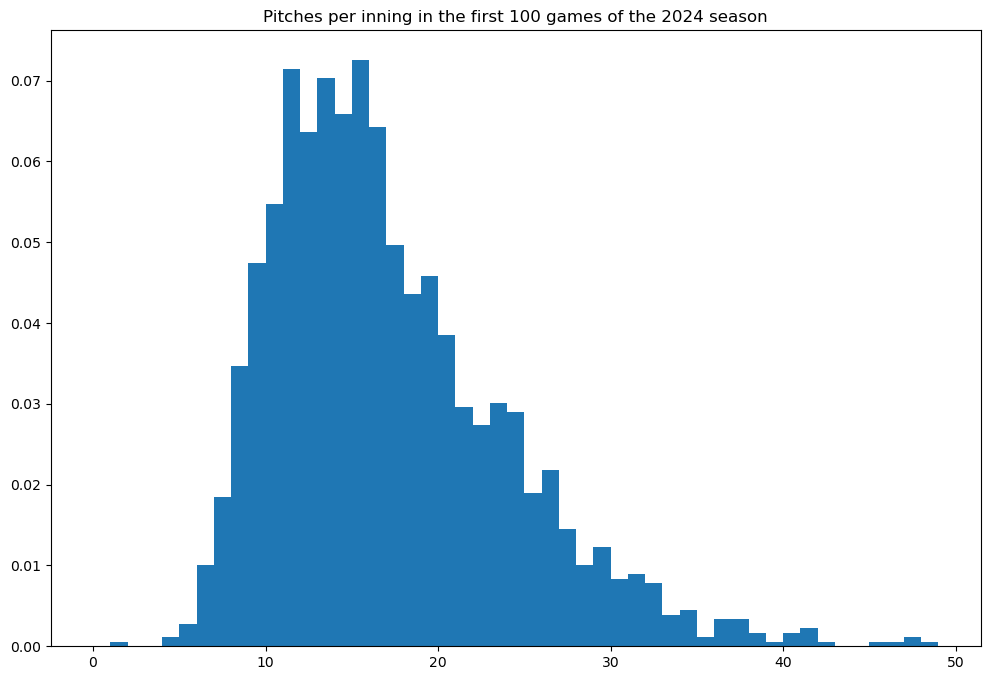

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title("Pitches per inning in the first 100 games of the 2024 season")
plt.hist(D.values,bins = range(0,50,1), density =True)
plt.show();